<a href="https://colab.research.google.com/github/megumihoshino/machine-learning-fundamental/blob/main/K_MEANS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#K-MEANS CLUSTERING
'''sebuah algoritma unsupervised learning yg digunakan utk mengelompokkan data
ke dlm clusters berdasarkan kesamaan fitur. algoritma ini membagi data mjd K clusters
(dg K sbg jml clusters yg ditentukan sblmnya). setiap cluster memiliki pusatnya
sendiri yg dinamakan centroid.'''

#METODE ELBOW
'''
cara utk menentukan jml K atau klaster adlh dg melihat langsung persebaran
data. cara ini digunakan jika kita menghadapi kumpulan data yg lbh kompleks
utk bs mengelompokkan data dg cepat.'''


In [1]:
import pandas as pd

#mengubah file csv mjd dataframe
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')
df.head(3) #menampilkan 3 baris pertama

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
#mengubah nama kolom
df = df.rename(columns={'Gender': 'gender','Age':'age',
                       'Annual Income (k$)':'annual_income',
                       'Spending Score (1-100)':'spending_score'})

#mengubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'],[0,1],inplace =True)

#menampilkan data yg telah diproses
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [5]:
from sklearn.cluster import KMeans

#menghilangkan kolom customer ID dan gender (krn kurang relevan)
X = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yg berisi inertia
clusters = []
for i in range (1,11):  #membuat list yg berisi inersia dari nilai K antara 1-11
  km =KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

#mengambil nilai 1-11 utk memberikan keragaman jml clusters yg mungkin
'''
Rentang 1-11 merupakan rentang kluster dengan asumsi jumlah kelompok tidak akan lebih dari 10
(salah satu alasannya karena jumlah data yang sedikit). Pada kasus ini gender
kurang relevan jika dibandingkan dengan fitur annual_income dan spending_score
kak. Maka dari itu agar mempermudah pemahaman fitur tersebut dihilangkan.
Salah satu alasannya karena k-means menghitung jarak antar data sehingga data
annual_income dan spending_score lebih relevan.
'''

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

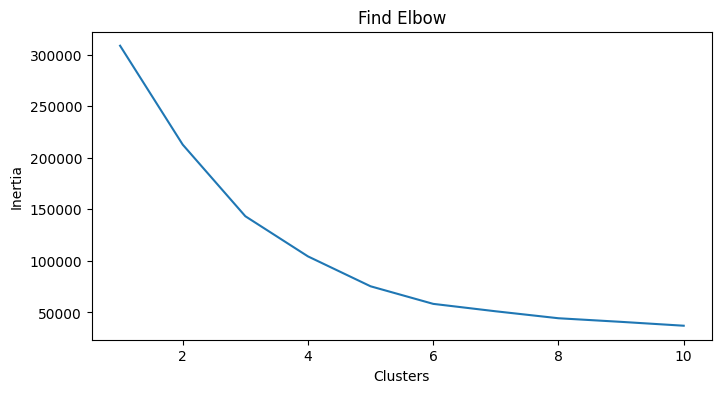

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Find Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

#elbpw berada di nilai K=5, stlh itu penurunan inersia tdk lg signifikan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


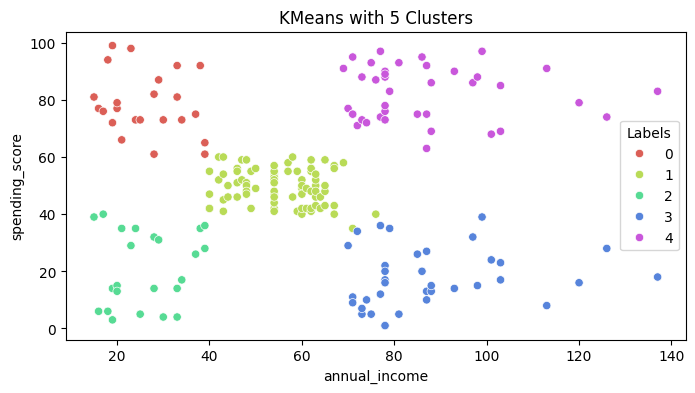

In [7]:
#melatih KMeans dg jml K yg didpt dari metode elbow di atas

#membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

#menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

#membuat plot KMeans dg 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'],hue=X['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('KMeans with 5 Clusters')
plt.show()